In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [5]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58892288/58889256 [==============================] - 35s 1us/step


In [6]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [7]:
base_dir=r'C:\Users\박정은\OneDrive - 고려대학교\삽질\파이썬\data'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

In [8]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

In [9]:
def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
        return features,labels

In [10]:
train_features,train_labels=extract_features(train_dir,2000)

Found 2000 images belonging to 2 classes.


In [11]:
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

In [12]:
from keras import models
from keras import layers
from keras import optimizers

In [14]:
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [17]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6928 - acc: 0.9885 - val_loss: 0.6875 - val_acc: 0.9940
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6854 - acc: 0.9960 - val_loss: 0.6816 - val_acc: 0.9930
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6782 - acc: 0.9975 - val_loss: 0.6745 - val_acc: 0.9950
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6709 - acc: 0.9985 - val_loss: 0.6682 - val_acc: 0.9920
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6637 - acc: 0.9980 - val_loss: 0.6608 - val_acc: 0.9940
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6553 - acc: 0.9995 - val_loss: 0.6535 - val_acc: 0.9940
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6472 - acc: 0.9995 - val_loss: 0.6469 - val_acc: 0.9920
Epoch 8/30
200

In [21]:
import matplotlib.pyplot as plt

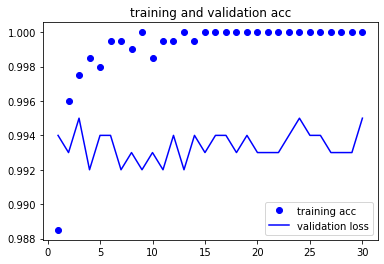

In [22]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.figure()
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation loss')
plt.title('training and validation acc')
plt.legend()
plt.show()

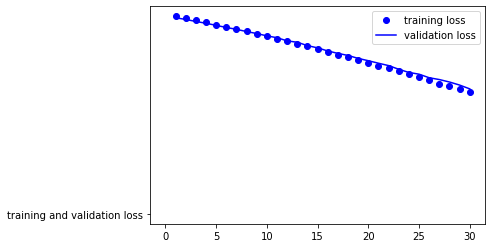

In [23]:
plt.figure()
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()